`Diamond Shape Print with *condition`

In [1]:
string = input("Enter The Number Of String: ")

rows = len(string)
records = []

for i in range(rows+1):
    if i != rows-1:
        print(string[:i])
        
    if i == len(range(rows)):
        b = list(range(i))
        b.reverse()
        for i in b:
            if i != rows-1:
                print(string[:i])

Enter The Number Of String: Welcome 2021

W
We
Wel
Welc
Welco
Welcom
Welcome
Welcome 
Welcome 2
Welcome 20
Welcome 2021
Welcome 20
Welcome 2
Welcome 
Welcome
Welcom
Welco
Welc
Wel
We
W



`Flipping coins and the straight line when the coins are in parallel or vertical to eachother`

In [2]:
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
import numpy as np
import imutils
import cv2
from IPython.display import display, Image
from PIL import Image as pil_image

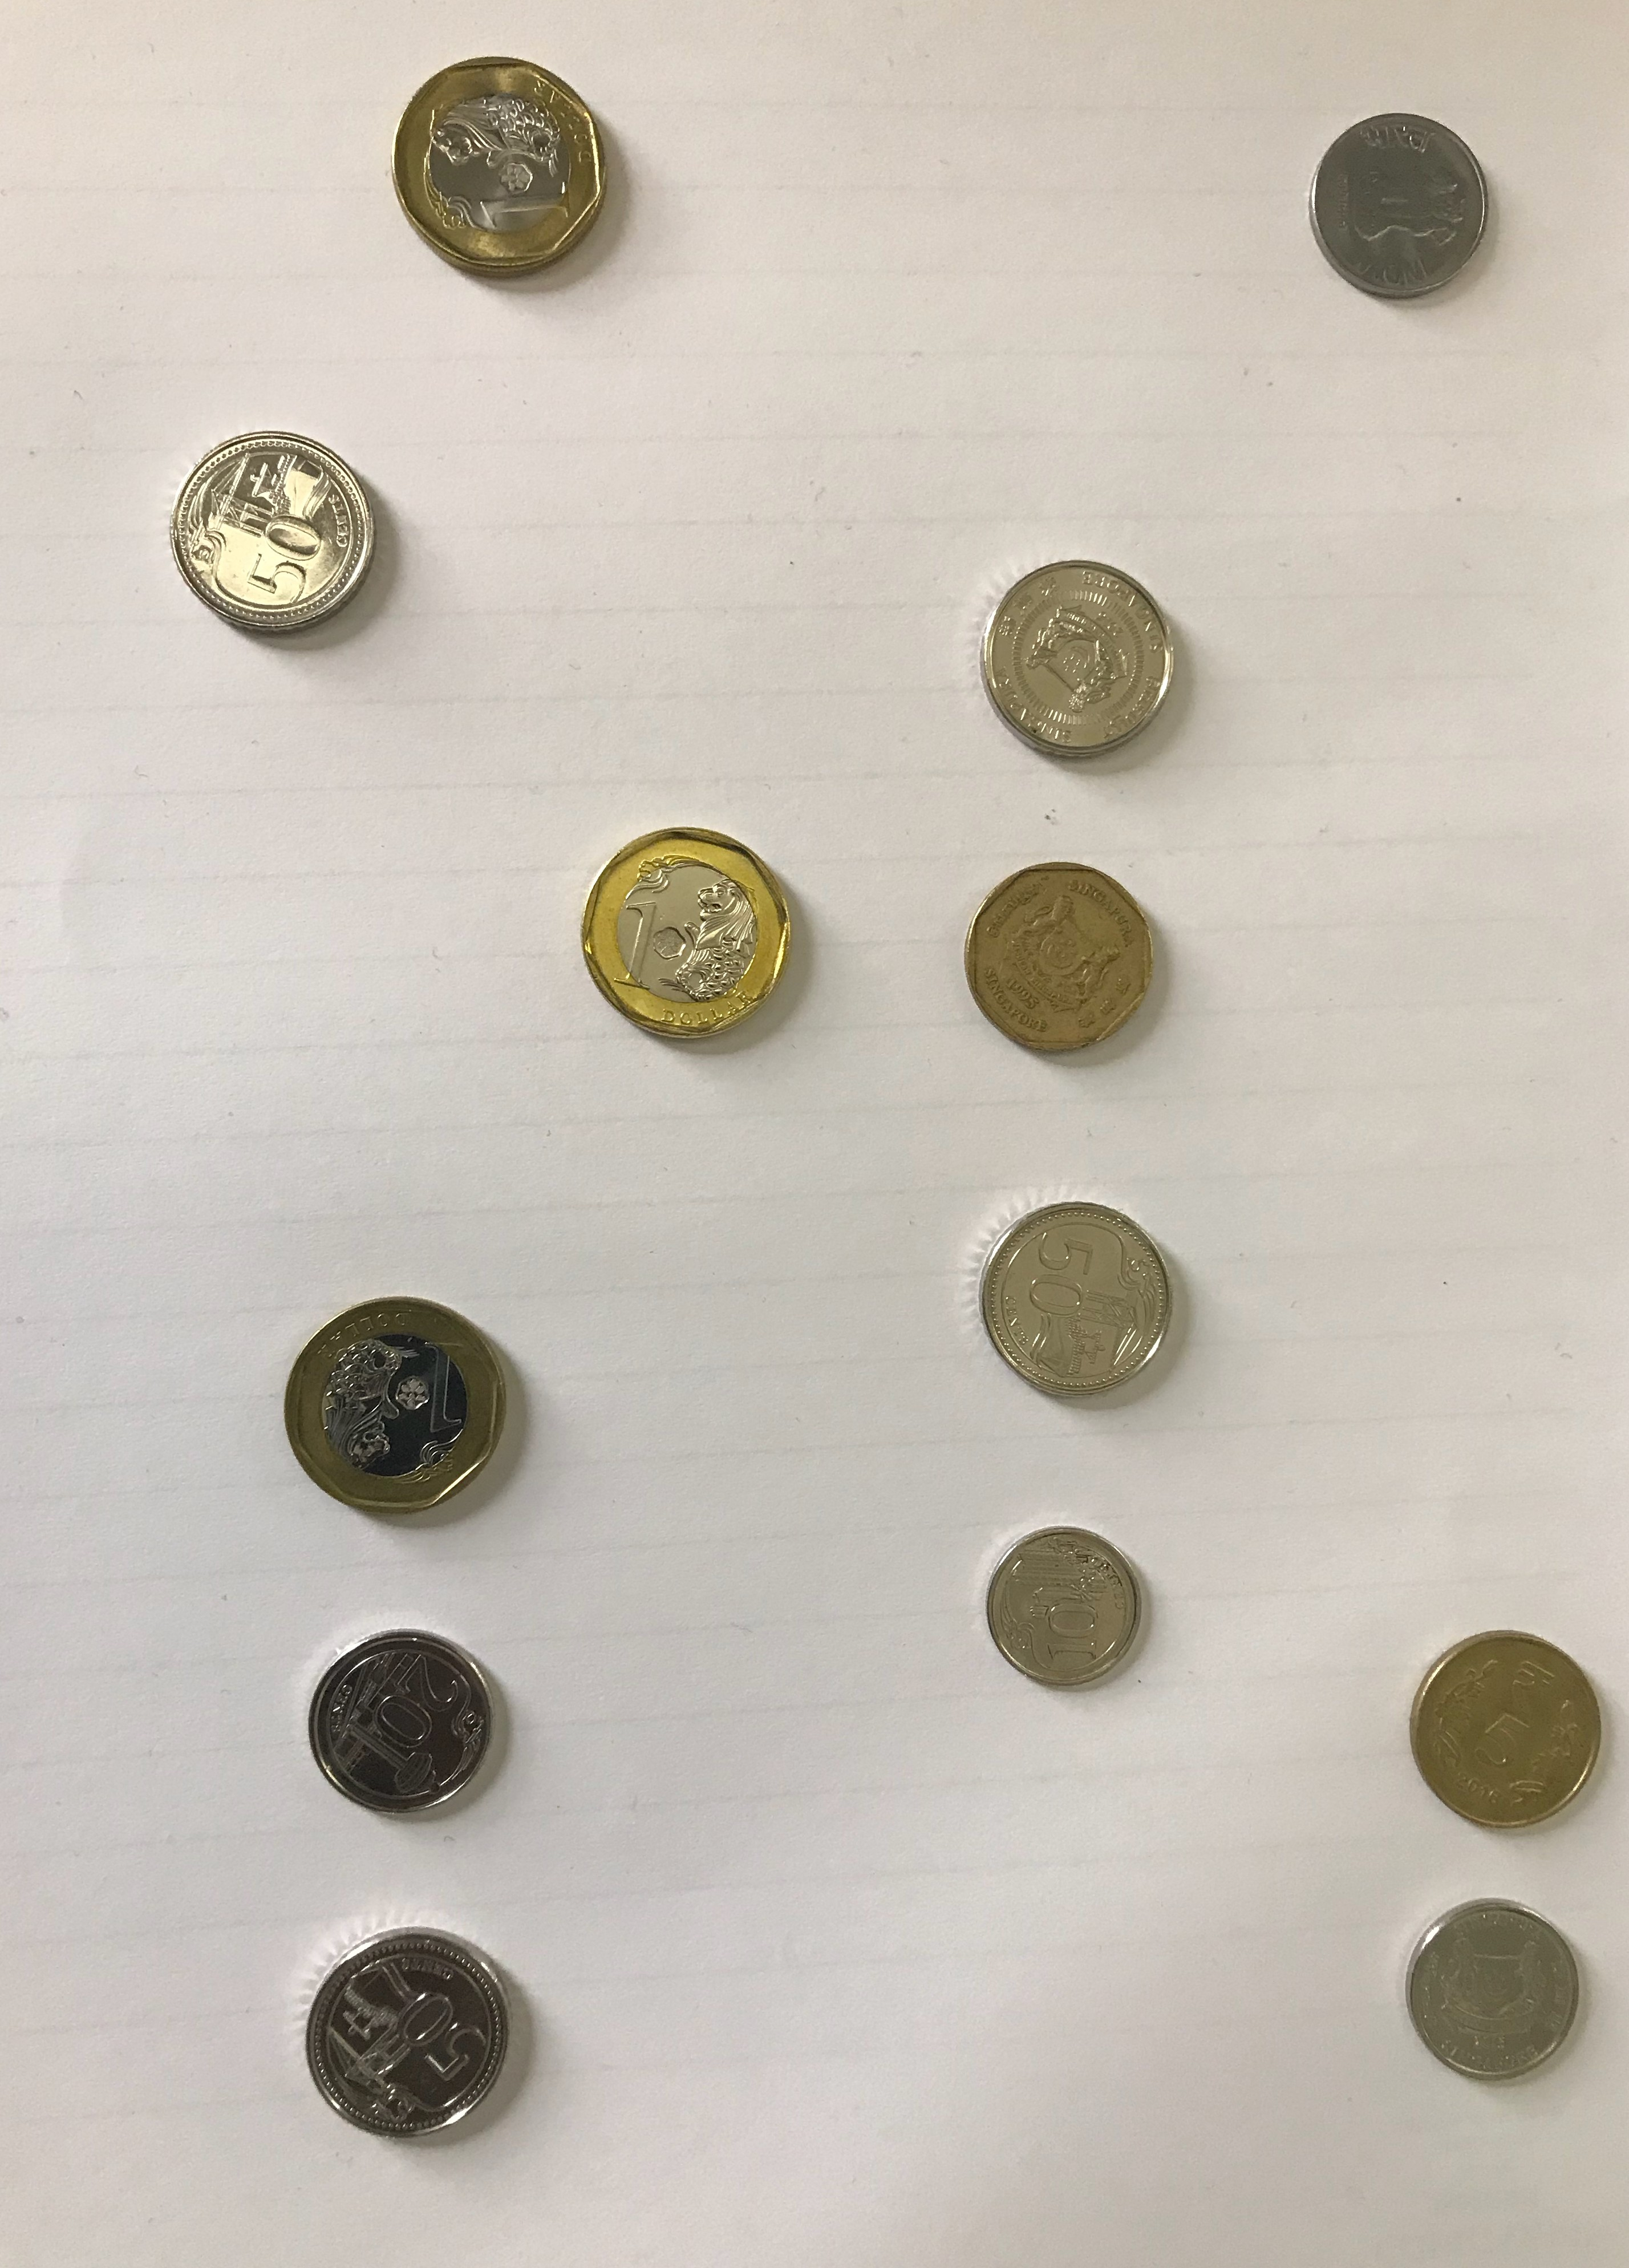

In [3]:
img_path = 'coin.jpg'

display(Image(img_path))

# 1. Custom-Algorithm

## i. Image Scaling (Particular Size) (ROTATE 90') For Easy Handling

In [4]:
Im = pil_image.open(img_path)

basewidth = 300
wpercent = (basewidth/float(Im.size[0]))
hsize = int((float(Im.size[1])*float(wpercent)))
img = Im.resize((basewidth,hsize), pil_image.ANTIALIAS)
img = img.transpose(pil_image.ROTATE_90)
img.save('sompic.jpg')

img = cv2.imread('sompic.jpg')
print(img.shape)

(300, 417, 3)


## ii. Mean Shift Filtering

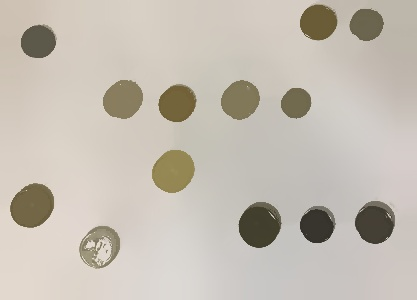

In [5]:
filtered_img = cv2.pyrMeanShiftFiltering(img, 21, 51)

gray = cv2.cvtColor(filtered_img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255,
    cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

_, ret = cv2.imencode('.jpg', filtered_img)

display(Image(ret))

## iii. Blob-Detector (AREA, CONVEX, INERTIA AND CIRCULARITY)

In [6]:
import cv2
import numpy as np

org = img.copy()
img = thresh.copy()

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 50
params.maxThreshold = 165


# Filter by Area.
params.filterByArea = True
params.minArea = 80

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.1
    
# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01

# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3 :
    detector = cv2.SimpleBlobDetector(params)
else : 
    detector = cv2.SimpleBlobDetector_create(params)


# Detect blobs.
keypoints = detector.detect(img)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

im_with_keypoints = cv2.drawKeypoints(org, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imwrite("out.jpg", im_with_keypoints)
# Show blobs
cv2.imshow("Keypoints", im_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()

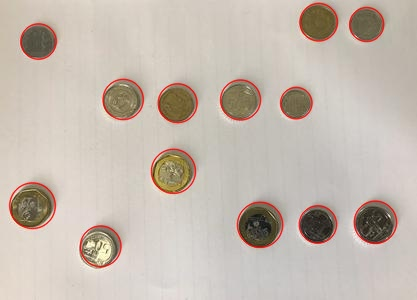

In [7]:
_, ret = cv2.imencode('.jpg', im_with_keypoints)

display(Image(ret))

## iv. RETREIVING KEYPOINTS

In [8]:
x = keypoints[0].pt[0] #i is the index of the blob you want to get the position
y = keypoints[1].pt[1]
s = keypoints[0].size

x_axis = []
y_axis = []
radius = []

for pts in keypoints:
    x_axis.append(pts.pt[0]) 
    y_axis.append(pts.pt[1])
    radius.append(pts.size)

In [9]:
import pandas as pd

df = pd.DataFrame()
df['x_axis'] = pd.Series(x_axis)
df['y_axis'] = pd.Series(y_axis)
df['radius'] = pd.Series(radius)

df.sort_values(by = 'y_axis',ascending=False, ignore_index=True)

,x_axis,y_axis,radius
0,100.150681,245.814026,40.468845
1,259.592987,224.345810,45.164318
2,317.348602,223.981949,37.296913
3,374.854279,221.812866,42.238194
4,31.983061,205.258011,45.483978
5,172.948547,170.852783,44.005131
6,177.103714,102.760803,38.765594
7,295.759369,102.625763,31.356367
8,240.021118,99.502060,39.820568
9,122.688965,99.020973,40.184177


In [10]:
pairs = []

coords = [i for i in df['y_axis'].values]

for index, node in enumerate(np.asarray(coords)):
    nodes = coords[index+1:]
    delta = nodes - node
    d = {int(index+index_+1): nodes[index_] for index_, value in enumerate(delta) if abs(value) < 8}
    pairs.append((node, list(d.keys())))

In [11]:
con_pair = []
for pair in pairs:
    if len(pair[1]) >= 1:
        con_pair.append(pair[1])
    else:
        con_pair.append('None')

In [12]:
pairs_ = ["None" for i in range(len(x_axis))]

for index, value in enumerate(con_pair):
    if value == 'None':
        pass
    else:
        if pairs_[index] == 'None':
            pairs_[index] = index
        else:
            pass
        
        for i in value:
            if pairs_[i] != 'None':
                pass
            else:
                pairs_[i] = index


In [13]:
df['pairs'] = pd.Series(pairs_)
df.loc[df.pairs == 'None']= np.nan

## V. STRAIGHT LINE FOR COINS IN PARALLEL

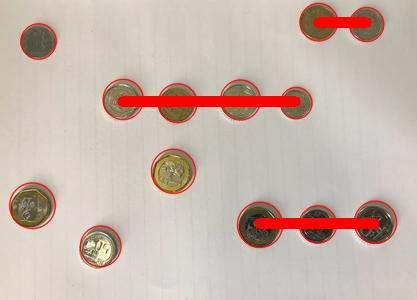

In [14]:
df = df.dropna()

for i in df.pairs.unique():
    center_point = int(df[df.pairs == i].y_axis.median())
    
    pairs = [j for j in df[df.pairs == i][['x_axis', 'y_axis']].itertuples()]
    
    for index, value in enumerate(pairs):
        if index + 1 != len(pairs):
            cv2.line(im_with_keypoints, pt1=(int(value[1]), center_point), 
                                         pt2=(int(pairs[index+1][1]), center_point), color=(0,0,255), thickness=10)
        else:
            pass
        
_, ret = cv2.imencode('.jpg', im_with_keypoints)

display(Image(ret))

# 2. WATERSHED ALGORITHM

In [15]:
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
import argparse
import imutils
import cv2

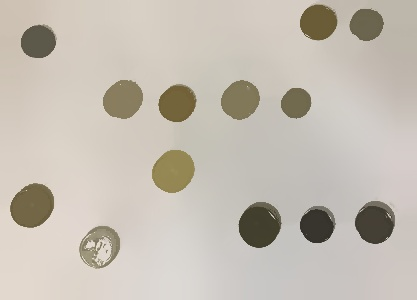

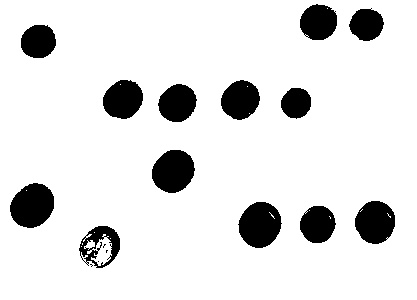

In [16]:
img = cv2.imread('sompic.jpg')
shifted = cv2.pyrMeanShiftFiltering(img, 21, 51)
_, ret_ = cv2.imencode('.jpg', shifted)
display(Image(ret_))

gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

_, ret_ = cv2.imencode('.jpg', thresh)
display(Image(ret_))

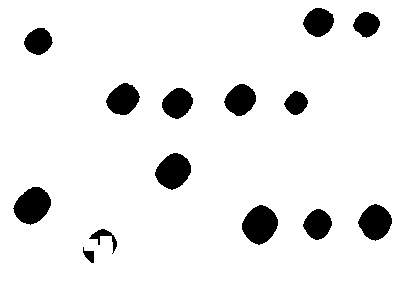

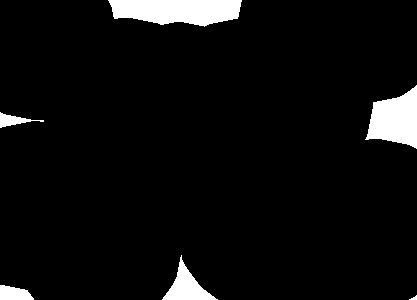

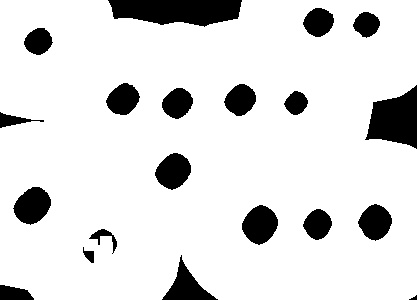

In [17]:
# # compute the exact Euclidean distance from every binary
# # pixel to the nearest zero pixel, then find peaks in this
# # distance map
# D = ndimage.distance_transform_edt(thresh)
# localMax = peak_local_max(D, indices=False, min_distance=50,
#     labels=thresh)
# # perform a connected component analysis on the local peaks,
# # using 8-connectivity, then appy the Watershed algorithm
# markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
# labels = watershed(-D, markers, mask=thresh)
# print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
_, ret_ = cv2.imencode('.jpg', sure_bg)
display(Image(ret_))

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
_, ret_ = cv2.imencode('.jpg', sure_fg)
display(Image(ret_))

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
_, ret_ = cv2.imencode('.jpg', unknown)
display(Image(ret_))

In [18]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_bg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

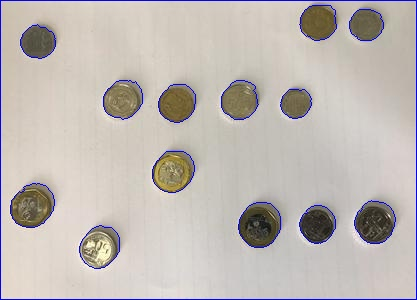

In [19]:
_, ret_ = cv2.imencode('.jpg', img)
display(Image(ret_))

In [20]:
dup = img.copy()

height, width = markers.shape

new_image = []
for i in markers.flatten():
    if i == -1:
        new_image.append(255)
    else:
        new_image.append(0)

new_image = np.array(new_image).reshape(height, width)

cnts = cv2.findContours(new_image, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

for contour in cnts:
    try:
        M = cv2.moments(contour)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        if cv2.contourArea(contour) > 100:
            cv2.drawContours(dup, [contour], -1, (0, 255, 0), 2)
            cv2.circle(dup, (cX, cY), 7, (255, 255, 255), -1)
            cv2.putText(dup, "center", (cX - 20, cY - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    except:
        pass

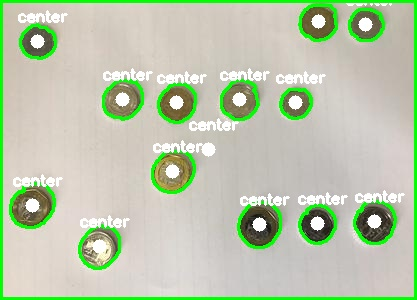

In [21]:
_, ret_ = cv2.imencode('.jpg', dup)
display(Image(ret_))

# Procedure :


```

1. Custom_ALGO:

Preprocessing Images with scaling and rotation

Apply and replace nearby pixel with mean pixel range within the specified radius.

Apply Thresholding

Apply into blob detector with convex, circular and inertia (Flipping coins)

Get keypoints and by using keypoints find pairs

draw straight line through median of y-axis of each pair sets.


2. Water SHED:

Thresholding

Dilation to detect background

Distance tranformation to detect forground

Calculate unknown delta by subtracting back-ground to forground

fill unknown with zero value

Apply into watershed algo

It'll Find the basin and watershed... 

draw the circle around coins

```

# 3. ARUCO Marker Detection

In [22]:
import numpy as np
import cv2
import cv2.aruco as aruco
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

In [23]:
cap = cv2.VideoCapture(0)
while(True):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_1000)
    arucoParameters = aruco.DetectorParameters_create()
    corners, ids, rejectedImgPoints = aruco.detectMarkers(
        gray, aruco_dict, parameters=arucoParameters)
    frame = aruco.drawDetectedMarkers(frame, corners)
    cv2.imshow('Display', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()